# Wine data clustering via Unsupervised Learning

##### 비지도 학습을 통한 와인 데이터의 분류를 시행하였습니다. 
KMeans clustering과, Hierarchical clustering, Gaussian Mixture Clustering을 사용하여 각각의 모델을 구성한 후 target의 데이터와 비교분석하여 정확도를 도출하였습니다.

In [670]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns

## 데이터 불러오기

In [671]:
wine = load_wine()
data = wine.data
target = wine.target

In [672]:
wine_df = pd.DataFrame(data, columns=wine.feature_names)

In [673]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


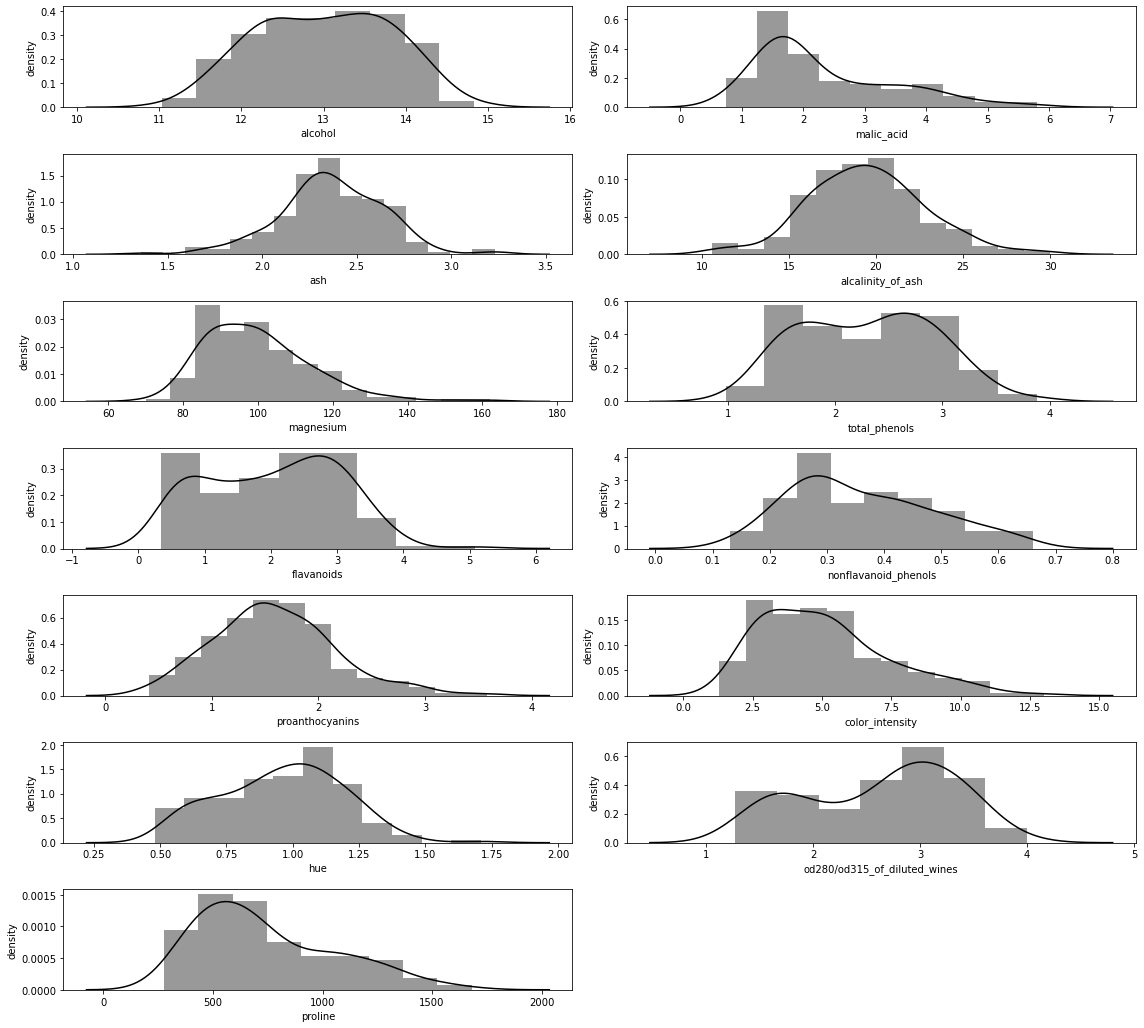

In [674]:
plt.figure(figsize = (16,16))
for i in range(len(wine_df.columns)):
    plt.subplot(8,2,i+1)
    plt.ylabel('density')
    sns.distplot(wine_df[wine_df.columns[i]],color ='black')
plt.tight_layout()

그래프 1. 각 변수에 따른 데이터의 분포

변수에 따라서 scale이 아주 다른 것을 확인할 수 있습니다. 정확한 모델링을 위해서 각 변수 값을 정규화하겠습니다.

## 데이터 정규화

MinMaxScaler 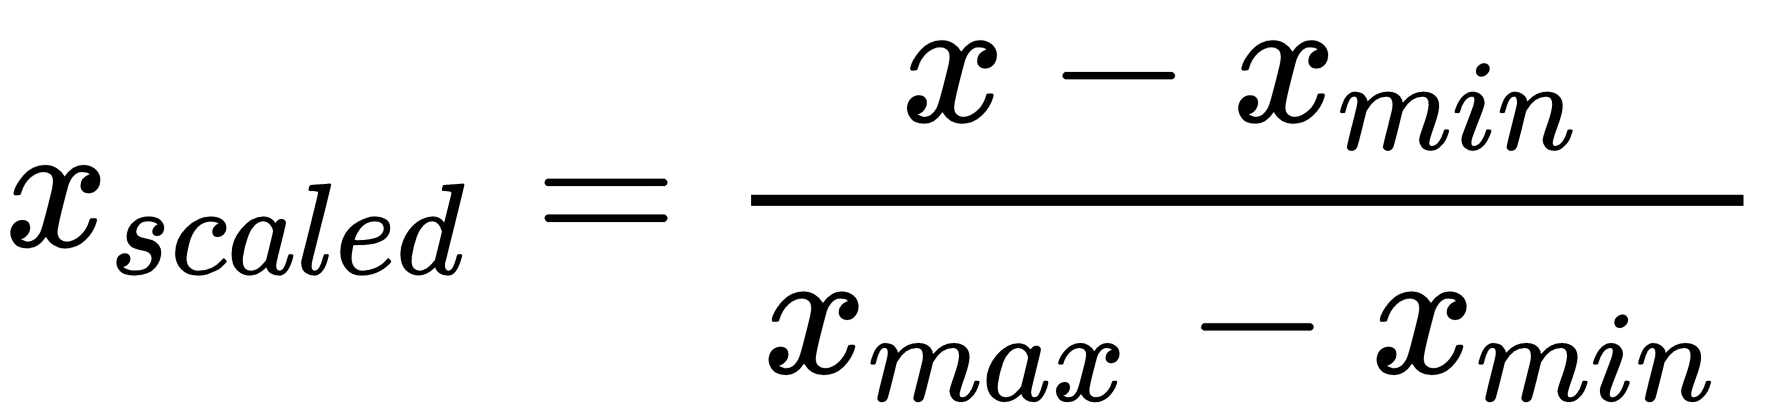

In [675]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(wine_df)

In [676]:
scaled_wine_df = pd.DataFrame(d, columns = wine.feature_names)
scaled_wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


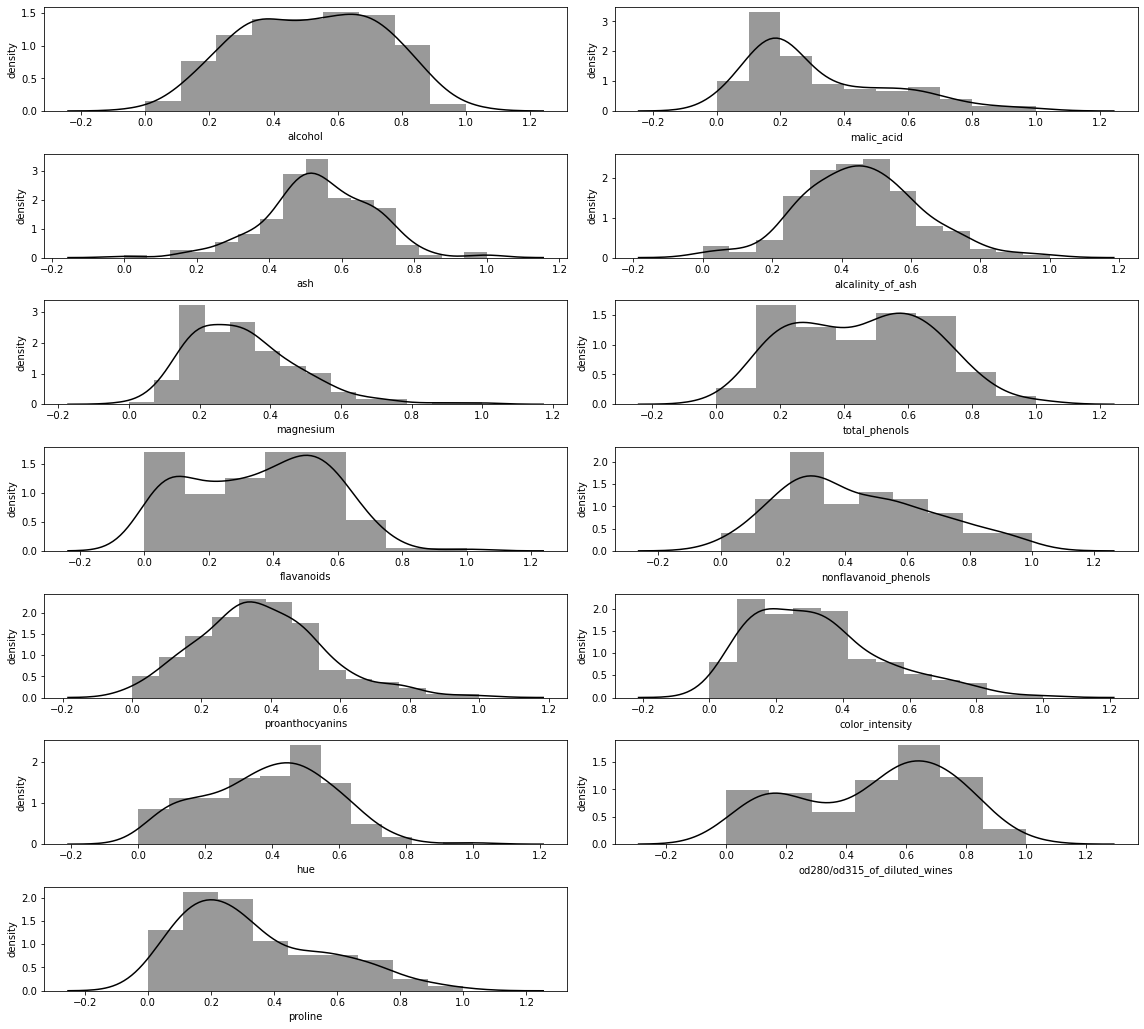

In [677]:
plt.figure(figsize = (16,16))
for i in range(len(wine_df.columns)):
    plt.subplot(8,2,i+1)
    plt.ylabel('density')
    sns.distplot(scaled_wine_df[scaled_wine_df.columns[i]],color ='black')
plt.tight_layout()

그래프 2. 정규화 된 각 변수들의 데이터 분포

## Unsupervised Learning

### 1. KMeans Clustering

K-Means clustering은 데이터와 각 그룹의 중심점까지의 거리를 측정하여 가까운 그룹으로 데이터를 분류하는 과정입니다. 다음과 같은 루프를 따릅니다.
1. 임의의 중심점 N개(clusters의 갯수)를 지정합니다
2. 데이터와 중심정의 거리를 측정하여 가장 가까운 그룹으로 데이터를 분류합니다.
3. 각 그룹에 해당하는 데이터들의 평균값을 계산하여 각 그룹의 중심점을 갱신합니다.
4. 중심점의 변화가 없을 때 까지 2-3을 반복합니다.

In [678]:
from sklearn.cluster import KMeans

#### 1.1. cluster의 갯수 정하기

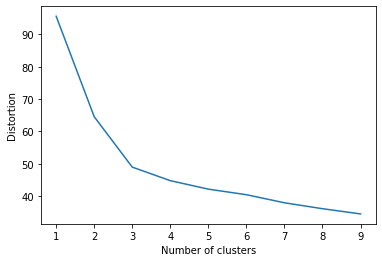

In [679]:
kiner = {} # Elbow-Method for determining clustering #
for k in range(1 ,10):
    km = KMeans(n_clusters = k, max_iter =300, random_state = 0)
    km.fit(scaled_wine_df)
    kiner[k] = km.inertia_
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.plot(list(kiner.keys()), list(kiner.values()))

그래프 3. cluster 개수에 따른 Distortion  
*이 때 Distortion은 Euclidean distance를 통해서 각 clusters 중심으로부터 데이터까지의 평균 거리를 의미합니다.

이를 기반으로 clusters의 개수는 3개로 지정하고 clustering 하였습니다. 

##### 1.2. 분류 및 결과

In [680]:
kmeans = KMeans(n_clusters = 3, n_init = 2, random_state=2)

In [681]:
kmeans.fit(scaled_wine_df)

KMeans(n_clusters=3, n_init=2, random_state=2)

In [682]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [687]:
kmeans_notscaled = KMeans(n_clusters = 3, n_init = 2, random_state=2) # 데이터 정규화 타당성을 위한 Clustering
kmeans_notscaled.fit(wine_df)

KMeans(n_clusters=3, n_init=2, random_state=2)

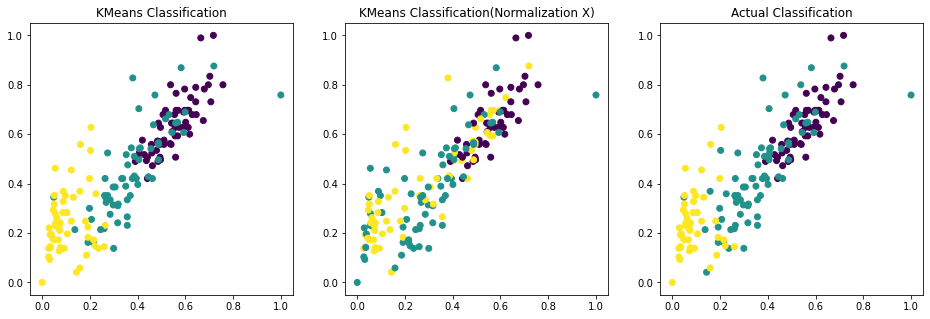

In [694]:
plt.figure(figsize = (16,5))
plt.subplot(131)
plt.title("KMeans Classification")
plt.scatter(scaled_wine_df.flavanoids,scaled_wine_df.total_phenols,c=kmeans.labels_)
plt.subplot(132)
plt.title("KMeans Classification(Normalization X)")
plt.scatter(scaled_wine_df.flavanoids,scaled_wine_df.total_phenols,c=kmeans_notscaled.labels_)
plt.subplot(133)
plt.title("Actual Classification")
plt.scatter(scaled_wine_df.flavanoids,scaled_wine_df.total_phenols,c=target)

그래프 4. KMeans clustering을 통한 예측(좌측, 중간(정규화 X))와 실제 값(우측)

In [695]:
accuracy_score(kmeans.labels_, target)

0.949438202247191

In [696]:
accuracy_score(kmeans_notscaled.labels_, target)

0.702247191011236

KMeans clustering 결과  
- 정규화를 하지 않은 데이터는 대략 70.2%의 정확도를 보이는 반면 정규화를 진행한 데이터는 대략 94.9%의 정확도를 보입니다. 

### 2. Hierarchical Clustering

Hierarchical CLustering은 데이터를 작은 규모에서부터 점점 뭉쳐나가는 식으로 데이터를 분류합니다.  
이 때 뭉치는 기준은 데이터간의 거리가 가까운 것끼리 뭉치며, 데이터를 뭉쳐 원하는 개수의 clusters가 될 때 까지 반복하여 분류를 진행합니다.

In [697]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#### 2.1. cluster의 갯수 정하기

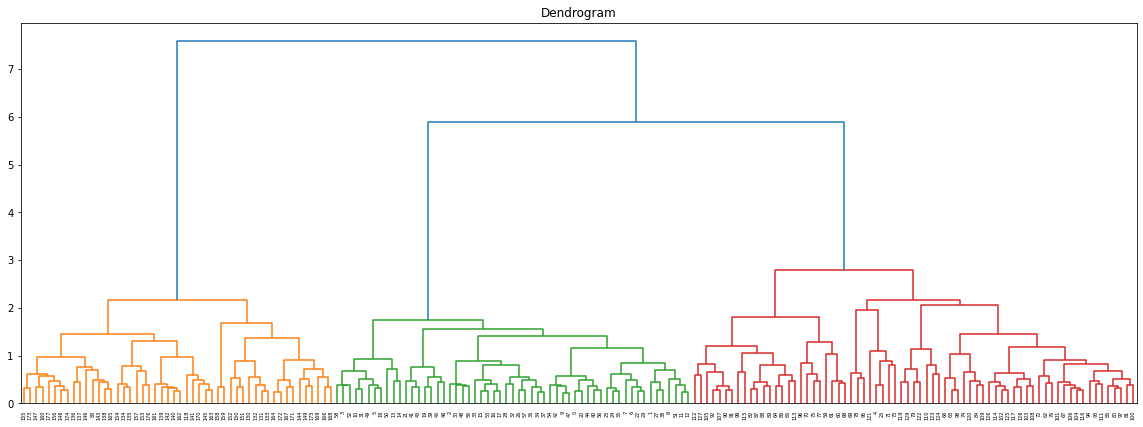

In [699]:
plt.figure(figsize=(20,7))
plt.title('Dendrogram')
link = sch.linkage(scaled_wine_df, method = 'ward')
dendogram = sch.dendrogram(link)

그래프 5. 와인 데이터에 대한 덴드로그램

덴드로그램에 따라 데이터는 3개의 군집을 보이는 것으로 해석하였습니다. 따라서 cluster의 개수를 3개로 지정하고 분류를 시행하였습니다.

##### 2.2. 분류 및 결과

In [700]:
hierarchi = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [701]:
hierarchi.fit(scaled_wine_df)

AgglomerativeClustering(n_clusters=3)

In [702]:
hierarchi.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

정확도 측정을 위해서 3개로 분류된 데이터의 값을 조정해줍니다. 

In [703]:
for i in range(len(cluster.labels_)):
    if hierarchi.labels_[i] == 0:
        hierarchi.labels_[i] = 1
    elif hierarchi.labels_[i] == 1:
        hierarchi.labels_[i] = 2
    else:
        hierarchi.labels_[i] = 0


In [704]:
hierarchi.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

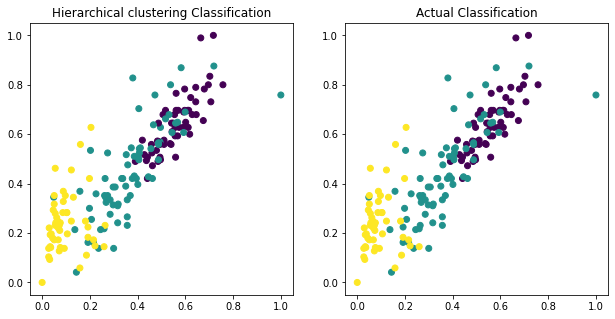

In [705]:
plt.figure(figsize = (16,5))
plt.subplot(131)
plt.title("Hierarchical clustering Classification")
plt.scatter(scaled_wine_df.flavanoids,scaled_wine_df.total_phenols,c=hierarchi.labels_)
plt.subplot(132)
plt.title("Actual Classification")
plt.scatter(scaled_wine_df.flavanoids,scaled_wine_df.total_phenols,c=target)

그래프 6. Hierarchical clustering을 통한 예측(좌측)와 실제 값(우측)

In [706]:
accuracy_score(hierarchi.labels_, target)

0.9775280898876404

Hierarchical clustering 결과  
- 대략 97.7%의 정확도를 보이고 있습니다.

### 3. Gaussian Mixture Model(GMM) Clustering

GMM clustering은 각 데이터의 분포가 가우시안 분포를 가진다고 가정하고 분석을 시행합니다.  
결과는 해당 그룹에 포함될 확률로써 계산되며, 확률이 가장 높은 그룹을 도출합니다. 

In [707]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

#### 3.1. cluster의 갯수 정하기

앞선 Hierarchical clustering과 K-Means clustering을 기반으로 clusters의 개수는 3개로 지정하였습니다.  
Gaussian Mixture Model Clustering을 단독으로 사용할 경우 clusters의 개수를 지정하기 위해서 Silhouette score 등이 사용되어질 수 있습니다. 

Silhouette score은 다음 두 가지를 고려하여 scoring을 매깁니다.
1. 그룹 내의 다른 모든 데이터와 샘플 사이의 평균 거리
2. 바로 옆 그룹의 모든 데이터와 샘플 사이의 평균 거리
이와같은 scoring을 통해서 그룹이 얼마나 잘 뭉쳐있고 분리되어있는지 나타내 줄 수 있습니다.  
citation : https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4

#### 3.2. 분류 및 결과

In [708]:
gaussian = GaussianMixture(n_components = 3, n_init = 2, random_state =2)

In [709]:
gaussian_label = gaussian.fit_predict(scaled_wine_df)

In [710]:
gaussian.label_ = np.array(gaussian_label)

In [711]:
gaussian.label_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

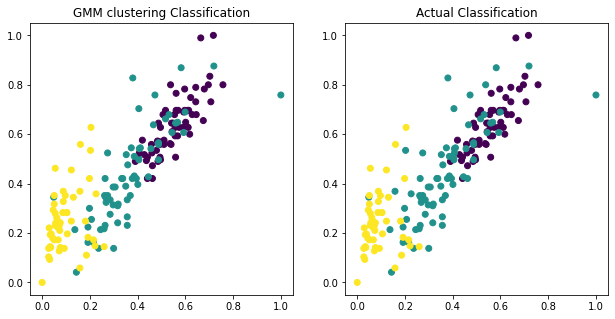

In [712]:
plt.figure(figsize = (16,5))
plt.subplot(131)
plt.title("GMM clustering Classification")
plt.scatter(scaled_wine_df.flavanoids,scaled_wine_df.total_phenols,c=gaussian.label_)
plt.subplot(132)
plt.title("Actual Classification")
plt.scatter(scaled_wine_df.flavanoids,scaled_wine_df.total_phenols,c=target)

그래프 7. GMM clustering을 통합 예측(좌측)와 실제 값(우측)

In [713]:
accuracy_score(gaussian.label_, target)

0.9662921348314607

GMM clustering 결과  
- 대략 96.6%의 정확도를 보이고 있습니다.

## 결론
- 각 변수의 scale에 따른 오차를 줄이기 위해서 정규화를 진행한 후 데이터를 분류하였습니다.
- K-Means clustering에서 정규화된 데이터의 정확도는 정규화되지 않은 데이터의 정확도에 비교하여 대략 25%의 향상을 보입니다.
- 3가지 방법(K-Means Clustering, Hierarchical Clustering, Gaussian Mixture Clustering)을 통하여 데이터를 비지도 학습을 통하여 분류하였고, 각 분류에 따른 정확도를 도출하였습니다.


||Accuracy(%)|
|:--:|:--:|
|K-Means Clustering|94.9|
|Hierarchical Clustering|97.7|
|GMM Clustering|96.6|


- Hierarchical Clustering을 통한 비지도 학습의 정확도가 가장 높게 도출되었습니다.
